Importing libraries and setting initial configs:

In [63]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=20,suppress=True,linewidth=np.inf)
source = 17
sink = 20

In [64]:
def functionQsigmoide(x, exp):
    a = 0.3
    return np.power(abs(x),exp)*(1+a)/(1 + a*np.power(abs(x),exp))

Gain function

In [65]:
def functionQ(x, exp):
	return np.power(abs(x),exp)

Evolution of system in one step:

In [66]:
def systemDynamics(Q,D,exp,step):
    for i in range(Q.shape[0]):
        for j in range(Q.shape[0]):
            D[i,j] = D[i,j] + ( functionQsigmoide(Q[i,j],1.1) - D[i,j]) * step
    return D

System solver:

In [67]:
def solving(D):
    V = np.zeros(22)
    V[source] = -1
    V[sink] = 1
    S = np.copy(D)
    soma = np.sum(D,axis=0)
    for i in range(S.shape[0]):
        S[i,i] = S[i,i] - soma[i]
    for i in range(S.shape[0]):
        S[i,i] = S[i,i] + 10**(-10)
    #S = S + 10**(-10)
    P1 = np.linalg.solve(S,V)
    P1 = P1-P1[sink]
    return P1

Creating distances and conductivity matrix

In [68]:
#distances
M = np.loadtxt('matrixmanhattan.txt')
G = nx.from_numpy_matrix(M)

In [69]:
def randomMatrix():
    C = np.random.rand(22,22)
    C = C + 1
    #condutivity
    C = (C+C.T)/4.0
    return C

In [70]:
C = randomMatrix()
M[M!=0] = 1/M[M!=0]
M = M * 10.0
D = C*M

Solving the system 

In [71]:
nsteps = 2000
stepsize = 0.01
Q = np.zeros((22,22))
exp = 1.1

tlist = list(range(nsteps))
a1 = list()
a2 = list()
b1 = list()
b2 = list()

niter = 15

Qmean = np.zeros((22,22))

for iteration in range(niter):
    
    C = randomMatrix()
    D = C*M
    
    D1 = np.copy(D)
    
    aa1 = list()
    aa2 = list()
    bb1 = list()
    bb2 = list()
    
    for loop in range(nsteps):

        P1 = solving(D1) 

        for i in range(Q.shape[0]):
            for j in range(Q.shape[0]):
                Q[i,j] = D1[i,j] * (P1[i]-P1[j])

        D1 = systemDynamics(Q,D1,exp,stepsize)
        aa1.append(D1[0,5]/M[0,5])
        aa2.append(D1[0,6]/M[0,6])
        bb1.append(D1[2,14]/M[2,14])
        bb2.append(D1[3,16]/M[3,16])
    Qmean = Qmean + Q
    a1.append(aa1)
    a2.append(aa2)
    b1.append(bb1)
    b2.append(bb2)

Qmean = Qmean/(niter)
#1 é o caminho de fora
#2 é o caminho de dentro

Plotting:

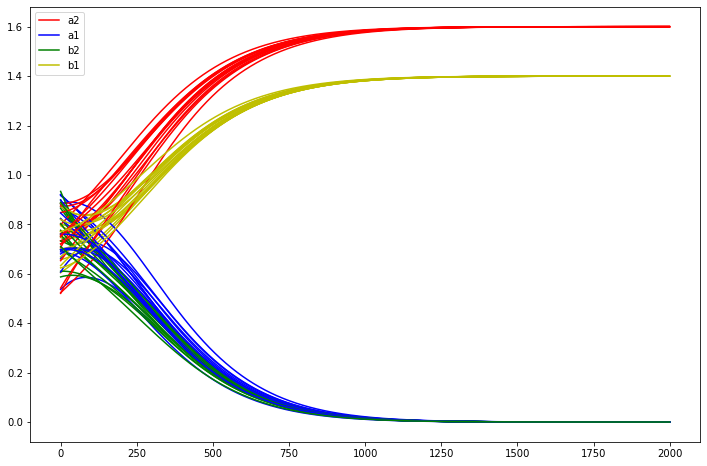

In [74]:
plt.plot(tlist, a1[0], 'r',label="a2") # plotting t, a separately 
plt.plot(tlist, a2[0], 'b',label="a1") # plotting t, a separately 
plt.plot(tlist, b1[0], 'g',label="b2") # plotting t, a separately 
plt.plot(tlist, b2[0], 'y',label="b1") # plotting t, a separately
for i in range(niter):
    plt.plot(tlist, a1[i], 'r') # plotting t, a separately 
    plt.plot(tlist, a2[i], 'b') # plotting t, a separately 
    plt.plot(tlist, b1[i], 'g') # plotting t, a separately 
    plt.plot(tlist, b2[i], 'y') # plotting t, a separately
plt.rcParams["figure.figsize"] = (12,8)
plt.legend()
plt.show()

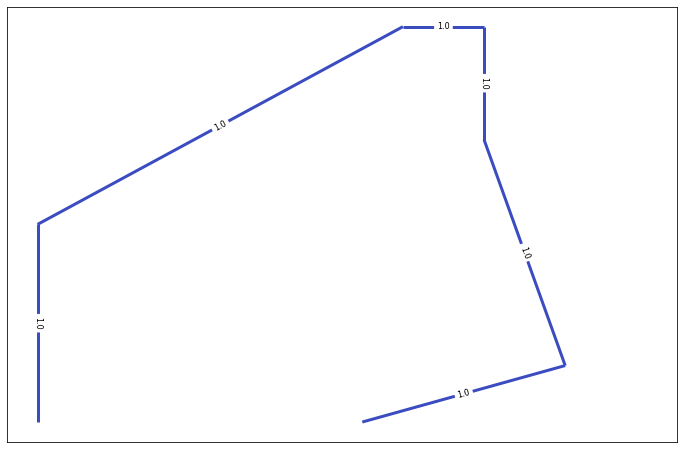

In [75]:
M = np.round(Qmean,decimals=3)
M = abs(M)

G = nx.from_numpy_matrix(M)

positions = {0: [1,10], 1: [1,12], 2: [1,14], 3: [5,12],
 4: [7,14], 5: [8, 1], 6: [8, 3], 7: [9, 5],
  8: [9, 6], 9: [9, 8], 10: [9,14], 11: [11, 5], 12: [11, 6],
   13: [11,14], 14: [11,16], 15: [13, 8], 16: [13,14], 17: [15, 1],
    18: [15, 3], 19: [15, 7], 20: [15, 9], 21: [15,16]}

for k in positions.keys():
    v = positions[k]
    positions[k] = [v[1],-v[0]]

edge_labels = nx.get_edge_attributes(G,'weight')
plt.rcParams["figure.figsize"] = (12,8)
edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())
nx.draw_networkx(G, pos=positions,with_labels=False,node_size=0,
                 edgelist=edges,edge_color=weights,edge_cmap=plt.cm.coolwarm, width=3.0)
nx.draw_networkx_edge_labels(G,pos=positions,font_size=8,edge_labels=edge_labels)
#cbar = plt.colorbar("coolwarm")
plt.show()

# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
nsteps = 2000
stepsize = 0.01
Q = np.zeros((22,22))
#exp = 0.5

tlist = list()
a1 = list()
a2 = list()
b1 = list()
b2 = list()

D1 = np.copy(D)


for loop in range(nsteps):
    
    P = solving(D1) 
    
    for i in range(Q.shape[0]):
        for j in range(Q.shape[0]):
            Q[i,j] = D1[i,j] * (P1[i]-P1[j])
                

    D1 = systemDynamics(Q,D1,exp,stepsize)
    tlist.append(loop)
    a1.append(D1[0,5])
    a2.append(D1[0,6])
    b1.append(D1[2,14])
    b2.append(D1[3,16])

In [ ]:
        aa1.append(D1[0,5]/M[0,5])
        aa2.append(D1[0,6]/M[0,6])
        bb1.append(D1[2,14]/M[2,14])
        bb2.append(D1[3,16]/M[3,16])